In [1]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
# Step 2: Loaded the Dataset
train = pd.read_csv(r"C:\Users\ky911\Downloads\archive (1)\train.csv")
test = pd.read_csv(r"C:\Users\ky911\Downloads\archive (1)\test.csv")


In [40]:
# Step 3: Exploratory Data Analysis (EDA)
# Inspecting dataset
print(train.info())
print(train.describe())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [38]:
# Checking for missing values present in dataset.
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


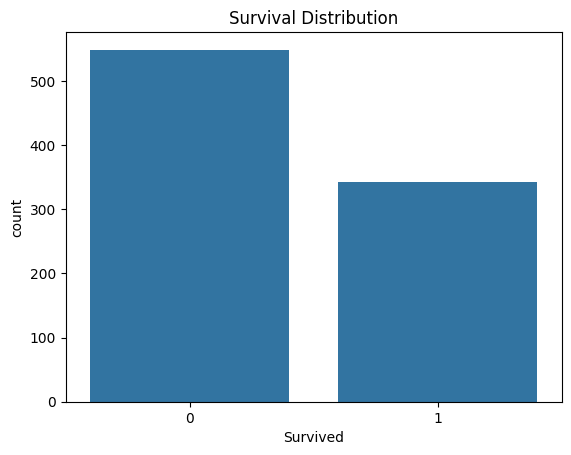

In [41]:
# Visualizing survival distribution
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution')
plt.show()

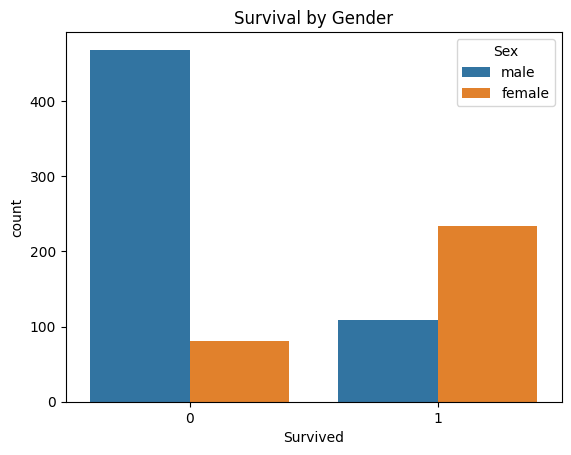

In [8]:
# Visualizing survival based on gender
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Gender')
plt.show()

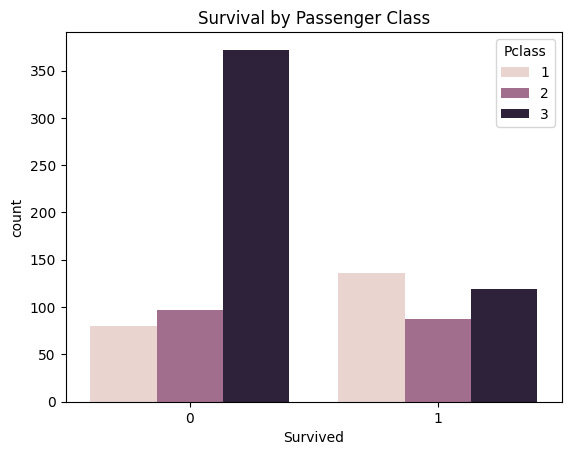

In [9]:
# Visualizing the survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
plt.show()

In [14]:
# Step 4: Data Cleaning and Feature Engineering
# Handling missing values

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

train['Fare'] = train['Fare'].fillna(train['Fare'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())


In [15]:
# Droping the irrelevant columns
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)


In [22]:
# Feature engineering: extracting the  titles from names
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Displaying the first few rows of the train and test datasets to verify the 'Title' column
display(train[['Name', 'Title']].head())
display(test[['Name', 'Title']].head())


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [18]:
# Map rare titles to "Rare"
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare",
    "Mlle": "Miss", "Countess": "Rare", "Ms": "Miss",
    "Lady": "Rare", "Jonkheer": "Rare", "Don": "Rare",
    "Dona": "Rare", "Mme": "Mrs", "Capt": "Rare", "Sir": "Rare"
}

In [23]:
# Assuming title_mapping is already defined
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

# Displaying  the first few rows of the train and test datasets to verify the 'Title' column after mapping
display(train[['Name', 'Title']].head())
display(test[['Name', 'Title']].head())


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [24]:
# Create family size feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Displaying  the first few rows of the train and test datasets to verify the 'FamilySize' column
display(train[['SibSp', 'Parch', 'FamilySize']].head())
display(test[['SibSp', 'Parch', 'FamilySize']].head())


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [21]:
# Created IsAlone feature
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

# Displaying  the updated DataFrame
display(train[['FamilySize', 'IsAlone']])
display(test[['FamilySize', 'IsAlone']])


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1
...,...,...
886,1,1
887,1,1
888,4,0
889,1,1


,FamilySize,IsAlone
0,1,1
1,2,0
2,1,1
3,1,1
4,3,0
...,...,...
413,1,1
414,1,1
415,1,1
416,1,1


In [25]:
# Droping the  Name column
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [26]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Sex', 'Embarked', 'Title']
for feature in categorical_features:
    encoder = LabelEncoder()
    train[feature] = encoder.fit_transform(train[feature])
    test[feature] = encoder.transform(test[feature])

In [27]:
# Displaying first few rows of train and test data after encoding
display(train[categorical_features].head())
display(test[categorical_features].head())

,Sex,Embarked,Title
0,1,2,2
1,0,0,3
2,0,2,1
3,0,2,3
4,1,2,2


,Sex,Embarked,Title
0,1,1,2
1,0,2,3
2,1,1,2
3,1,2,2
4,0,2,3


In [28]:
# Normalizing the  numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])

# Displaying  first few rows of train and test data after normalization
display(train[numerical_features].head())
display(test[numerical_features].head())

,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


,Age,Fare
0,0.394887,-0.490783
1,1.355510,-0.507479
2,2.508257,-0.453367
3,-0.181487,-0.474005
4,-0.565736,-0.401017


In [29]:
# Step 5: Model Building
# Split dataset into training and validation sets
from sklearn.model_selection import train_test_split
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Evaluate Logistic Regression model
from sklearn.metrics import classification_report, roc_auc_score
y_pred_logreg = logreg.predict(X_val)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_logreg))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_val, logreg.predict_proba(X_val)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Logistic Regression ROC-AUC Score: 0.890990990990991


In [32]:
# Training Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Evaluating Random Forest model
y_pred_rf = rf.predict(X_val)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Random Forest ROC-AUC Score: 0.9009652509652509


In [34]:
# Step 6: Finalizing the Model and Making Predictions on Test Set
final_model = rf
predictions = final_model.predict(test.drop('PassengerId', axis=1))

In [35]:
# Save Submission File
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

In [36]:
print("Submission file created successfully.")

Submission file created successfully.


In [37]:
display(submission.head())

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
